<a href="https://colab.research.google.com/github/ganeshmp01/DS-Classwork/blob/main/CNN_with_variousoptimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def showimg(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

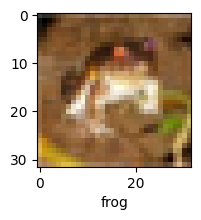

In [ ]:
showimg(X_train, y_train, 0)

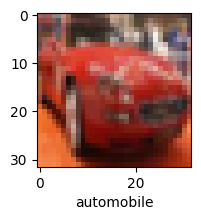

In [ ]:
showimg(X_train, y_train, 5)

Normalizing the training data

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

Now let us build a convolutional neural network to train our images

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
batch_size=100
num_classes=10
epochs=15

def build_model(optimizer):

 model=Sequential()

 model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
 model.add(MaxPooling2D(pool_size=(2,2)))


 model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
 model.add(MaxPooling2D(pool_size=(2,2)))

 model.add(Flatten())

 model.add(Dense(64, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))

 model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])
 return model

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

Train the model

In [ ]:
optimizers = ['SGD', 'Adagrad','RMSprop','Adam']

for i in optimizers:
 print("Optimizer used :",i)

 model = build_model(i)
 cnn_new=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

Optimizer used : SGD
Epoch 1/15
500/500 [==============================] - 4s 6ms/step - loss: 2.2086 - accuracy: 0.1957 - val_loss: 2.0332 - val_accuracy: 0.2643
Epoch 2/15
500/500 [==============================] - 2s 4ms/step - loss: 1.9574 - accuracy: 0.2969 - val_loss: 1.8797 - val_accuracy: 0.3308
Epoch 3/15
500/500 [==============================] - 2s 4ms/step - loss: 1.8083 - accuracy: 0.3598 - val_loss: 1.7623 - val_accuracy: 0.3849
Epoch 4/15
500/500 [==============================] - 2s 4ms/step - loss: 1.6623 - accuracy: 0.4102 - val_loss: 1.5683 - val_accuracy: 0.4370
Epoch 5/15
500/500 [==============================] - 2s 4ms/step - loss: 1.5566 - accuracy: 0.4463 - val_loss: 1.5277 - val_accuracy: 0.4589
Epoch 6/15
500/500 [==============================] - 2s 5ms/step - loss: 1.4930 - accuracy: 0.4682 - val_loss: 1.4855 - val_accuracy: 0.4722
Epoch 7/15
500/500 [==============================] - 2s 5ms/step - loss: 1.4439 - accuracy: 0.4862 - val_loss: 1.4076 - val_ac

In [ ]:
optimizers = ['SGD', 'Adagrad','RMSprop','Adam']

for i in optimizers:
 print("Optimizer used :",i)

 model = build_model(i)
 cnn_new=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test,y_test))

In [ ]:
from prettytable import PrettyTable

In [ ]:
myTable = PrettyTable(["Optimizer", "loss", "accuracy", "val_loss", "val_accuracy" ,"Total_Time_Taken(secs)"])

myTable.add_row(["SGD", "1.2015", "0.5790", "1.2125","0.5765","33"])
myTable.add_row(["Adagrad", "1.7037", "0.4002", "1.6952","0.4034","38"])
myTable.add_row(["RMSprop", "0.4501", "0.8433", "1.0370","0.6957","34"])
myTable.add_row(["Adam", "0.6065", "0.7885", "0.9546","0.6854","33"])


print(myTable)

+-----------+--------+----------+----------+--------------+------------------------+
| Optimizer |  loss  | accuracy | val_loss | val_accuracy | Total_Time_Taken(secs) |
+-----------+--------+----------+----------+--------------+------------------------+
|    SGD    | 1.2015 |  0.5790  |  1.2125  |    0.5765    |           33           |
|  Adagrad  | 1.7037 |  0.4002  |  1.6952  |    0.4034    |           38           |
|  RMSprop  | 0.4501 |  0.8433  |  1.0370  |    0.6957    |           34           |
|    Adam   | 0.6065 |  0.7885  |  0.9546  |    0.6854    |           33           |
+-----------+--------+----------+----------+--------------+------------------------+


In [ ]:
cnn_new.history

{'loss': [1.597356915473938,
  1.2440987825393677,
  1.1071903705596924,
  1.0175409317016602,
  0.9509508013725281,
  0.8981115818023682,
  0.850185215473175,
  0.8170983791351318,
  0.7786610722541809,
  0.7430928945541382,
  0.709502100944519,
  0.6822929978370667,
  0.6543972492218018,
  0.627595067024231,
  0.6064527034759521],
 'accuracy': [0.4252200126647949,
  0.5641199946403503,
  0.6124200224876404,
  0.6447200179100037,
  0.6693199872970581,
  0.6883999705314636,
  0.7051799893379211,
  0.715939998626709,
  0.7314599752426147,
  0.7417600154876709,
  0.7534999847412109,
  0.7631999850273132,
  0.7732800245285034,
  0.7821599841117859,
  0.7885400056838989],
 'val_loss': [1.320345401763916,
  1.1945297718048096,
  1.0761358737945557,
  1.0126633644104004,
  1.0057213306427002,
  0.9670781493186951,
  0.9443262815475464,
  0.929196298122406,
  0.9337343573570251,
  0.8957066535949707,
  0.8963572978973389,
  0.9229019284248352,
  0.9486469626426697,
  0.9233959913253784,
  0.9

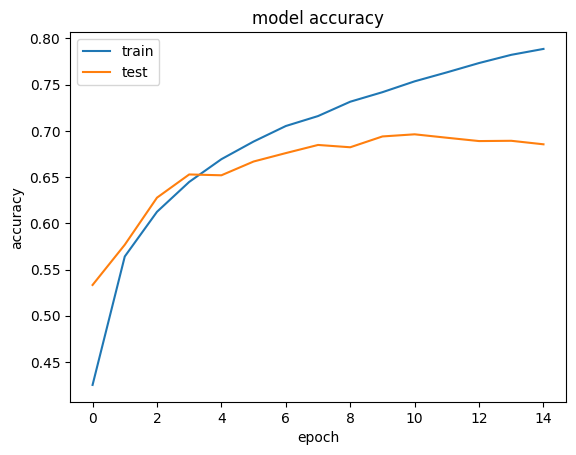

In [ ]:
plt.plot(cnn_new.history['accuracy'])
plt.plot(cnn_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_train, y_train)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5740 - accuracy: 0.7971


[0.5740213394165039, 0.7971000075340271]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9546 - accuracy: 0.6854


[0.9546188712120056, 0.6854000091552734]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.1264641e-04, 6.6122395e-04, 6.4296223e-04, 9.6196741e-01,
        1.2388718e-03, 9.8381238e-03, 7.0310938e-03, 6.6791436e-05,
        1.6888721e-02, 1.3520825e-03],
       [1.1400959e-03, 6.1717931e-02, 3.7214016e-07, 3.3149217e-07,
        3.7798806e-08, 7.7117024e-09, 1.0724680e-09, 2.9510259e-08,
        9.3670046e-01, 4.4078488e-04],
       [1.6263260e-01, 1.5190020e-01, 8.6440734e-04, 1.1976064e-02,
        1.4907891e-04, 1.0590631e-03, 4.0815774e-04, 2.9173624e-03,
        3.0690879e-01, 3.6118430e-01],
       [9.7779822e-01, 1.4846105e-03, 4.6998560e-03, 3.5097706e-04,
        1.0385950e-02, 2.1827977e-06, 6.7840891e-05, 2.2858439e-05,
        4.9088863e-03, 2.7866167e-04],
       [1.0285630e-06, 1.5348720e-05, 2.8857619e-03, 7.0800162e-03,
        4.1999489e-01, 7.3361127e-03, 5.6261420e-01, 8.3647819e-07,
        7.0052323e-05, 1.7546575e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

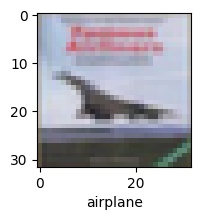

In [ ]:
showimg(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.86      0.74      0.80      1000
           2       0.63      0.55      0.59      1000
           3       0.58      0.34      0.43      1000
           4       0.63      0.59      0.61      1000
           5       0.53      0.72      0.61      1000
           6       0.80      0.75      0.77      1000
           7       0.68      0.78      0.73      1000
           8       0.80      0.79      0.80      1000
           9       0.66      0.87      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

